What happens to the fits of the beta distributions

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm
import matplotlib as mpl


In [8]:
df = pd.read_csv('../fig/model1/cth_param.csv')

df.head()

,Unnamed: 0,alpha1,beta1,alpha2,beta2,p,flag
0,0,3.359656e+117,5.273543e+122,0.590231,4.193425,-2.529267e+122,1.0
1,1,1.295328e+01,4.972585e+01,0.778589,1.296615,3.558512e-01,0.0
2,2,1.451073e+00,1.574190e+00,0.662913,1.598883,7.660499e-01,0.0
3,3,1.351252e+00,2.536973e+01,2.217640,1.730726,1.224517e-01,0.0
4,4,8.682291e-01,1.717052e+00,7.043817,2.700983,4.255461e-01,0.0


In [133]:
def meanBeta(alpha, beta):
    return alpha / (alpha + beta)
params = ['alpha1', 'beta1', 'alpha2', 'beta2', 'p']

df = pd.read_csv('../fig/model1/cth_param.csv')
df_p = df.loc[(df.p < 1) & (df.p >0)]
df_p.loc[df_p.flag == 1]


df_np = df.loc[(df.p >= 1) | (df.p <= 0)]
df_np.loc[df_np.flag == 0]
# df_np
df['valid_p'] = (df.p < 1) & (df.p >0)
df['one_left_peak'] = (df.alpha1 < df.beta1)
df['two_left_peak'] = (df.alpha2 < df.beta2)
df['mean1'] = meanBeta(df.alpha1, df.beta1)
df['mean2'] = meanBeta(df.alpha2, df.beta2)

df.loc[df.valid_p]
print(df.loc[:2])

def switchDist(row):
    row.alpha1, row.beta1, row.alpha2, row.beta2, row.p, row.mean1, row.mean2 = row.alpha2, row.beta2, row.alpha1, row.beta1, 1 - row.p , row.mean2, row.mean1
    return row

def switchBeta(row):
    if (row.mean1 > row.mean2):
        row = switchDist(row)
    return row
df = df.apply(switchBeta , axis = 1)

def fixInvalidP(row):
    if row.p > 1: 
        row.p = 1
        row.alpha2, row.beta2 = np.nan, np.nan
    elif row.p < 0:
        row.p = 0
        row = switchDist(row)
        row.alpha2, row.beta2 = np.nan, np.nan
    return row

df = df.apply(fixInvalidP, axis = 1)
df

   Unnamed: 0         alpha1          beta1    alpha2     beta2  \
0           0  3.359656e+117  5.273543e+122  0.590231  4.193425   
1           1   1.295328e+01   4.972585e+01  0.778589  1.296615   
2           2   1.451073e+00   1.574190e+00  0.662913  1.598883   

               p  flag  valid_p  one_left_peak  two_left_peak     mean1  \
0 -2.529267e+122   1.0    False           True           True  0.000006   
1   3.558512e-01   0.0     True           True           True  0.206660   
2   7.660499e-01   0.0     True           True           True  0.479652   

      mean2  
0  0.123385  
1  0.375187  
2  0.293092  


,Unnamed: 0,alpha1,beta1,alpha2,beta2,p,flag,valid_p,one_left_peak,two_left_peak,mean1,mean2
0,0,0.590231,4.193425,NaN,NaN,1.000000,1.0,False,True,True,0.123385,0.000006
1,1,12.953283,49.725850,0.778589,1.296615,0.355851,0.0,True,True,True,0.206660,0.375187
2,2,0.662913,1.598883,1.451073,1.574190,0.233950,0.0,True,True,True,0.293092,0.479652
3,3,1.351252,25.369728,2.217640,1.730726,0.122452,0.0,True,True,False,0.050569,0.561660
4,4,0.868229,1.717052,7.043817,2.700983,0.425546,0.0,True,True,False,0.335835,0.722828
...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,5.120241,6.836245,NaN,NaN,1.000000,0.0,False,False,True,0.428240,0.500138
276,276,6.923755,6.577919,NaN,NaN,1.000000,0.0,False,False,False,0.512807,0.615648
277,277,7.338822,7.869282,NaN,NaN,1.000000,0.0,False,True,True,0.482560,0.465417
278,278,34.492444,16.892589,NaN,NaN,1.000000,0.0,False,False,False,0.671255,0.665561


In [134]:
df_plot = df.copy()
# df_plot[params] = df.apply(lambda row: row[params] if (row.valid_p) else row[params] * np.nan, axis = 1)
df_plot
# df.apply(lambda x: 0 if (x.alpha1 >1) else 1, axis=1)

,Unnamed: 0,alpha1,beta1,alpha2,beta2,p,flag,valid_p,one_left_peak,two_left_peak,mean1,mean2
0,0,0.590231,4.193425,NaN,NaN,1.000000,1.0,False,True,True,0.123385,0.000006
1,1,12.953283,49.725850,0.778589,1.296615,0.355851,0.0,True,True,True,0.206660,0.375187
2,2,0.662913,1.598883,1.451073,1.574190,0.233950,0.0,True,True,True,0.293092,0.479652
3,3,1.351252,25.369728,2.217640,1.730726,0.122452,0.0,True,True,False,0.050569,0.561660
4,4,0.868229,1.717052,7.043817,2.700983,0.425546,0.0,True,True,False,0.335835,0.722828
...,...,...,...,...,...,...,...,...,...,...,...,...
275,275,5.120241,6.836245,NaN,NaN,1.000000,0.0,False,False,True,0.428240,0.500138
276,276,6.923755,6.577919,NaN,NaN,1.000000,0.0,False,False,False,0.512807,0.615648
277,277,7.338822,7.869282,NaN,NaN,1.000000,0.0,False,True,True,0.482560,0.465417
278,278,34.492444,16.892589,NaN,NaN,1.000000,0.0,False,False,False,0.671255,0.665561


Text(0.5, 0.98, 'Estimators of time distribution COD')

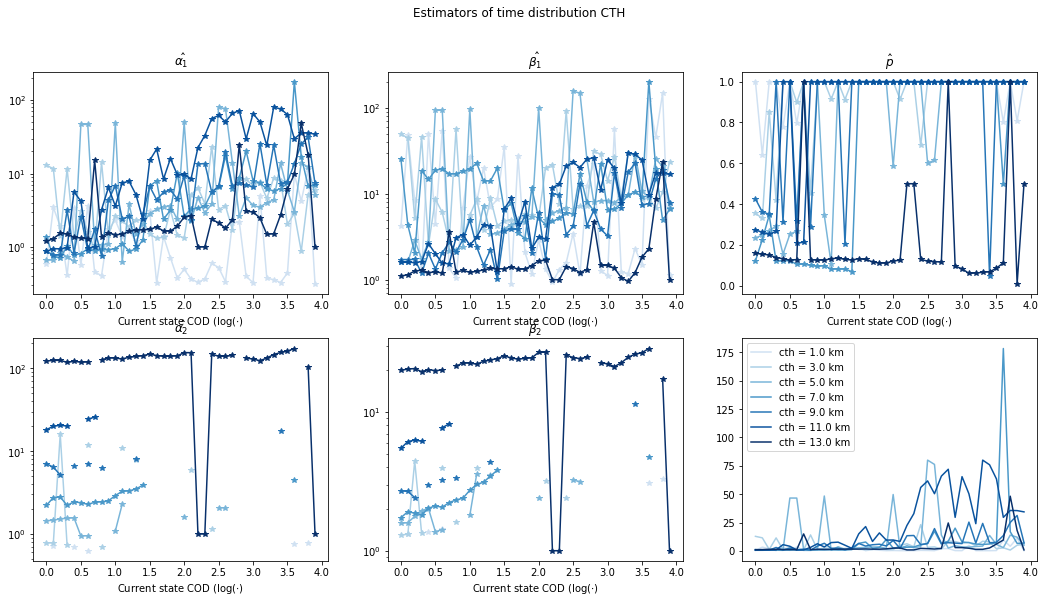

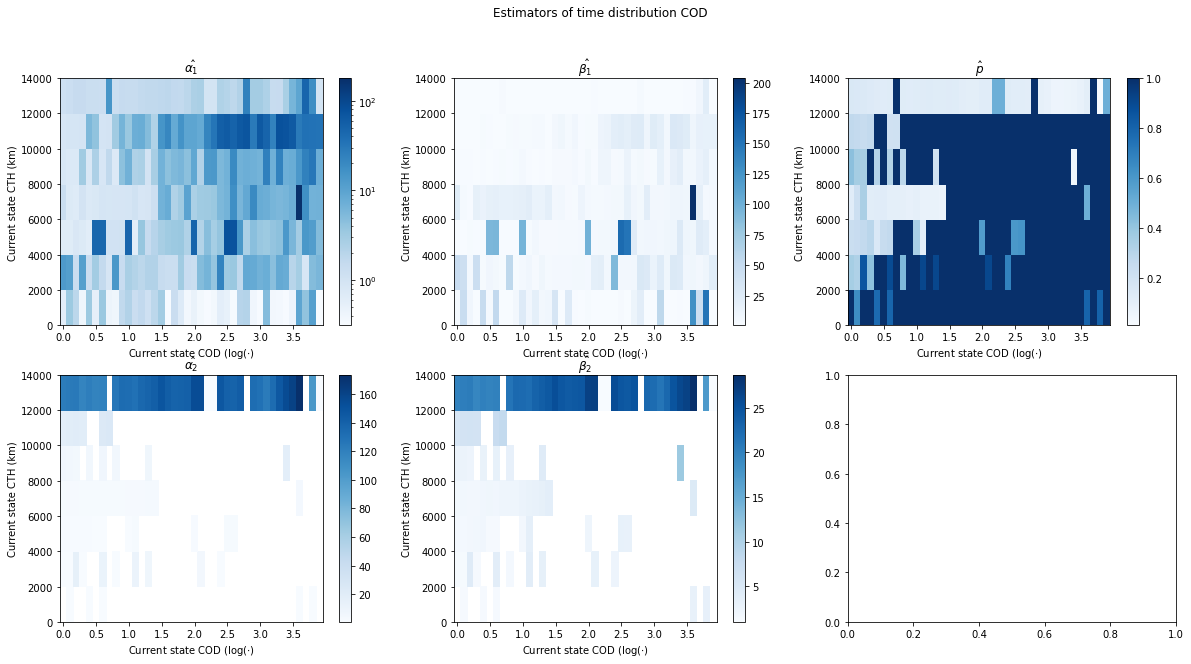

In [135]:
# cod estimators normal distribution
dh = 2e3
dd = .1
mu_h = np.arange(1e3, 14e3, dh) # m
mu_d = np.arange(0, 4, dd)
n_h = len(mu_h)
n_d = len(mu_d)
mu_h_ = np.append(mu_h - dh/2, mu_h.max() + dh/2) ## for pcolormesh
mu_d_ = np.append(mu_d - dd/2, mu_d.max() + dd/2) ## for pcolormesh
h_labels = [f'cth = {h * 1e-3} km' for h in mu_h]

    
color= cm.Blues(np.linspace(.2,1, len(mu_h)))
color_ml= cm.Greens(np.linspace(.2,1, len(mu_h)))

    
cth_params = df_plot[['alpha1', 'beta1', 'alpha2', 'beta2', 'p']].values

fig, ax = plt.subplots(2, 3, figsize = (18, 9))

alpha1, beta1, alpha2, beta2, p = [a.reshape((n_d, n_h)) for a in cth_params.T]
title = ['$\\hat{\\alpha_1}$', '$\\hat{\\beta_1}$', '$\\hat{p}$', 
         '$\\hat{\\alpha_2}$', '$\\hat{\\beta_2}$']

for i, c, c_ml, label in zip(range(n_h), color, color_ml, h_labels):
    ax[0,0].plot(mu_d, alpha1[:,i], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    # ax[0].plot(mu_d, )
    ax[0,1].plot(mu_d, beta1[:,i], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[0,2].plot(mu_d, p[:,i], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,0].plot(mu_d, alpha2[:,i], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,1].plot(mu_d, beta2[:,i], label = label, c = c,
                marker = '*', 
               # ls = '--'
               )
    ax[1,2].plot(mu_d, alpha1[:,i], label = label, c = c)
    ax[1,2].legend()

for axs, titles in zip(ax.flatten()[:-1], title):
    axs.set(xlabel = 'Current state COD (log($\cdot$)',
          # ylabel = '$\hat{\mu_d}$',
          title = titles)
    if titles != '$\\hat{p}$':
        axs.set(yscale = 'log')
    


fig.suptitle('Estimators of time distribution CTH')


fig, ax = plt.subplots(2, 3, figsize = (20, 10))

im = ax[0,0].pcolormesh(mu_d_, mu_h_, alpha1.T, cmap = cm.Blues, norm=mpl.colors.LogNorm())
plt.colorbar(im, ax=ax[0,0],
             # label = title[0]
             )

im = ax[0,1].pcolormesh(mu_d_, mu_h_, beta1.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,1],
             # label = title[1]
             )
im = ax[0,2].pcolormesh(mu_d_, mu_h_, p.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[0,2],
             # label = title[2]
             )
im = ax[1,0].pcolormesh(mu_d_, mu_h_, alpha2.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,0],
             # label = title[3]
             )
im = ax[1,1].pcolormesh(mu_d_, mu_h_, beta2.T, cmap = cm.Blues)
plt.colorbar(im, ax=ax[1,1],
             # label = title[4]
             )

for axs, title in zip(ax.flatten()[:-1], title):
    axs.set(xlabel = 'Current state COD (log($\cdot$)',
          ylabel = 'Current state CTH (km)',
          title = title)

fig.suptitle('Estimators of time distribution COD')